<a href="https://colab.research.google.com/github/09aryan/MEME_CLASSIFICATION_USING_SENTIMENT_ANALYSIS/blob/main/Complete_Vit_SBERT_Bidirectional_LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sentence-transformers
!pip install timm
import tensorflow as tf
from sentence_transformers import SentenceTransformer
from tensorflow.keras.layers import Input, Dense, Reshape, Concatenate, Bidirectional, LSTM
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F
import timm
import pandas as pd
import numpy as np
import cv2
import os
import re
from google.colab import drive

drive.mount('/content/drive')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=948b4c4b33bdf839a1aa2d76c6b627ed8b6714751170ba300cf01fbf5a6be160
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 8.1 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
def load_image_data_in_batches(folder_path, max_images=4501, target_size=(224, 224), batch_size=500):
    images = []
    file_names = sorted(os.listdir(folder_path), key=lambda x: int(re.findall(r'\d+', x)[0]) if re.findall(r'\d+', x) else 0)

    for i in range(0, max_images, batch_size):
        batch_file_names = file_names[i:i+batch_size]
        batch_images = []

        for file_name in batch_file_names:
            file_path = os.path.join(folder_path, file_name)

            try:
                img = cv2.imread(file_path)

                # Check if the image is loaded successfully
                if img is not None and not img.size == 0:
                    img = cv2.resize(img, target_size)
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    batch_images.append(img)
                else:
                    print(f"Error loading image {file_path}: Image not loaded successfully")
            except Exception as e:
                print(f"Error loading image {file_path}: {str(e)}")

        images.extend(batch_images)

    return np.array(images)

# Load labels.csv file
labels_path = '/content/drive/MyDrive/labels.csv'
labels_df = pd.read_csv(labels_path)

# Select the first 3000 rows from labels dataframe
labels_df_subset = labels_df.head(4500)

# Extract text_corrected and overall_sentiment
X_text = labels_df_subset['text_corrected'].tolist()
y_sentiment = labels_df_subset['overall_sentiment'].values

# Load only the first 3000 images
images_folder_path = '/content/drive/MyDrive/images'
X_images = load_image_data_in_batches(images_folder_path)

# Assuming max_text_length is defined somewhere
max_text_length = 300

# Convert X_images to torch tensor
batch_size = 500
num_batches = len(X_images) // batch_size
X_images_torch = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    X_batch = torch.tensor(X_images[start_idx:end_idx].transpose(0, 3, 1, 2), dtype=torch.float32)
    X_images_torch.append(X_batch)

X_images_torch = torch.cat(X_images_torch, dim=0)


# Convert text data to a list of strings
X_text = [str(text) for text in X_text]

# Load SBERT model
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Tokenize text using the SentenceTransformer tokenizer
batch_size = 500
num_batches = len(X_text) // batch_size
X_text_embeddings = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    X_text_batch = sbert_model.encode(X_text[start_idx:end_idx], convert_to_tensor=True)
    X_text_embeddings.append(X_text_batch)

X_text_embeddings = torch.cat(X_text_embeddings, dim=0)
# Convert torch tensor to numpy array
# Convert torch tensor to numpy array
X_text_embeddings_np = X_text_embeddings.cpu().numpy()

# Convert numpy array to TensorFlow tensor
X_text_embeddings_tf = tf.convert_to_tensor(X_text_embeddings_np, dtype=tf.float32)






Error loading image /content/drive/MyDrive/images/image_1567.jpg: Image not loaded successfully
Error loading image /content/drive/MyDrive/images/image_4924.jpg: Image not loaded successfully


.gitattributes:   0%|          | 0.00/690 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.69k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

In [ ]:
# Load labels.csv file
labels_path = '/content/drive/MyDrive/labels.csv'
labels_df = pd.read_csv(labels_path)

# Select the first 3000 rows from labels dataframe
labels_df_subset = labels_df.head(4500)

# Extract text_corrected and overall_sentiment
X_text = labels_df_subset['text_corrected'].tolist()
y_sentiment = labels_df_subset['overall_sentiment'].values
# Assuming max_text_length is defined somewhere
max_text_length = 300

In [ ]:

len(X_images_torch)

3000

In [ ]:
X_text_embeddings_tf.shape

TensorShape([3000, 384])

In [ ]:
X_text_embeddings_np.shape

(3000, 384)

In [ ]:
# Function to process images in batches
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)
def process_images_in_batches(images_torch, model, batch_size=500):
    num_batches = len(images_torch) // batch_size
    processed_images = []

    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        X_images_batch = images_torch[start_idx:end_idx]

        with torch.no_grad():
            image_embedding = model(X_images_batch)

        # Flatten the image embedding
        image_embedding = torch.flatten(image_embedding, start_dim=1)

        # Convert to NumPy array
        image_embedding = image_embedding.numpy()
        processed_images.append(image_embedding)

    processed_images = np.concatenate(processed_images, axis=0)
    return processed_images


image_embedding = process_images_in_batches(X_images_torch, vit_model)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

In [ ]:
image_embedding.shape

(3000, 1000)

In [ ]:
X_text_embeddings_np.shape

(3000, 384)

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout1D

# Assuming create_model function is already defined
def create_model(input_dim_text, input_dim_image, num_classes):
    text_input = Input(shape=(input_dim_text,), dtype=tf.float32, name='text_input')
    image_input = Input(shape=(input_dim_image,), name='image_input')

    # Embedding layer for text data
    embedded_text = Dense(128, activation='relu')(text_input)

    # Reshape the embedded_text to a 3D tensor for Bidirectional LSTM
    reshaped_text = Reshape((-1, 128))(embedded_text)

    # Bidirectional LSTM layers for text data
    lstm_text = Bidirectional(LSTM(128, return_sequences=True))(reshaped_text)
    lstm_text = SpatialDropout1D(0.2)(lstm_text)
    lstm_text = Bidirectional(LSTM(64))(lstm_text)
    lstm_text = Dropout(0.5)(lstm_text)

    # Concatenate text and image embeddings
    concatenated_features = Concatenate()([lstm_text, image_input])

    # Dense layers
    dense_output = Dense(128, activation='relu')(concatenated_features)
    dense_output = BatchNormalization()(dense_output)
    dense_output = Dropout(0.5)(dense_output)

    # Output layer with softmax for multi-class classification
    sentiment_output = Dense(num_classes, activation='softmax', name='sentiment')(dense_output)

    # Define the model
    model = tf.keras.models.Model(inputs=[text_input, image_input], outputs=[sentiment_output])



    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


    return model

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text_input (InputLayer)     [(None, 384)]                0         []                            
                                                                                                  
 image_input (InputLayer)    [(None, 1000)]               0         []                            
                                                                                                  
 concatenate (Concatenate)   (None, 1384)                 0         ['text_input[0][0]',          
                                                                     'image_input[0][0]']         
                                                                                                  
 tf.expand_dims (TFOpLambda  (None, 1, 1384)              0         ['concatenate[0][0]']     

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.layers import Input, Bidirectional, LSTM, Dense, Concatenate
from tensorflow.keras.utils import to_categorical
label_encoder = LabelEncoder()
y_sentiment_numerical = label_encoder.fit_transform(y_sentiment)

# Convert numerical labels to one-hot encoding
y_sentiment_onehot = to_categorical(y_sentiment_numerical)
# Convert NumPy array to TensorFlow tensor
numpy_array = X_text_embeddings.cpu().numpy()

text_tensor = tf.convert_to_tensor(numpy_array, dtype=tf.float32)
image_tensor = tf.convert_to_tensor(image_embedding, dtype=tf.float32)

# Split the data into train, validation, and test sets using NumPy arrays
X_text_train_np, X_text_temp_np, X_images_train_np, X_images_temp_np, y_sentiment_train_np, y_sentiment_temp_np = train_test_split(
    text_tensor.numpy(), image_tensor.numpy(), y_sentiment_onehot, test_size=0.2, random_state=42, stratify=y_sentiment_numerical)

X_text_val_np, X_text_test_np, X_images_val_np, X_images_test_np, y_sentiment_val_np, y_sentiment_test_np = train_test_split(
    X_text_temp_np, X_images_temp_np, y_sentiment_temp_np, test_size=0.5, random_state=42, stratify=y_sentiment_temp_np)

# Convert NumPy arrays back to TensorFlow tensors
X_text_train = tf.convert_to_tensor(X_text_train_np, dtype=tf.float32)
X_images_train = tf.convert_to_tensor(X_images_train_np, dtype=tf.float32)
y_sentiment_train = tf.convert_to_tensor(y_sentiment_train_np, dtype=tf.float32)

X_text_val = tf.convert_to_tensor(X_text_val_np, dtype=tf.float32)
X_images_val = tf.convert_to_tensor(X_images_val_np, dtype=tf.float32)
y_sentiment_val = tf.convert_to_tensor(y_sentiment_val_np, dtype=tf.float32)

X_text_test = tf.convert_to_tensor(X_text_test_np, dtype=tf.float32)
X_images_test = tf.convert_to_tensor(X_images_test_np, dtype=tf.float32)
y_sentiment_test = tf.convert_to_tensor(y_sentiment_test_np, dtype=tf.float32)

# Check the number of samples after the split
print(len(X_text_train), len(X_text_val), len(X_text_test))

# Create the model
num_classes = 5  # Replace with the actual number of classes
model = create_model(input_dim_text=len(X_text_train[0]), input_dim_image=len(X_images_train[0]), num_classes=num_classes)

# Reduce the learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compile the model with the new optimizer
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# ... (unchanged)

# Add early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit([X_text_train.numpy(), X_images_train], y_sentiment_train,
          validation_split=0.2,  # 20% of the training data will be used for validation
          epochs=7, batch_size=50, callbacks=[early_stopping])

# Evaluate the model on the test set
loss, accuracy = model.evaluate([X_text_test, X_images_test], y_sentiment_test, batch_size=50)

print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

3600 450 450
Epoch 1/7
58/58 [==============================] - 9s 35ms/step - loss: 1.9544 - accuracy: 0.2378 - val_loss: 2.7135 - val_accuracy: 0.0764
Epoch 2/7
58/58 [==============================] - 1s 13ms/step - loss: 1.5697 - accuracy: 0.3465 - val_loss: 2.3250 - val_accuracy: 0.0472
Epoch 3/7
58/58 [==============================] - 1s 19ms/step - loss: 1.4567 - accuracy: 0.3889 - val_loss: 1.7466 - val_accuracy: 0.2444
Epoch 4/7
58/58 [==============================] - 1s 18ms/step - loss: 1.3667 - accuracy: 0.4247 - val_loss: 1.6086 - val_accuracy: 0.2708
Epoch 5/7
58/58 [==============================] - 1s 18ms/step - loss: 1.2893 - accuracy: 0.4736 - val_loss: 1.4930 - val_accuracy: 0.3583
Epoch 6/7
58/58 [==============================] - 1s 18ms/step - loss: 1.1556 - accuracy: 0.5451 - val_loss: 1.4046 - val_accuracy: 0.3917
Epoch 7/7
9/9 [==============================] - 0s 5ms/step - loss: 1.5706 - accuracy: 0.4356
Test Loss: 1.5706454515457153
Test Accuracy: 0.43555

In [ ]:
predictions = model.predict([X_text_test, X_images_test])


10/10 [==============================] - 1s 5ms/step


In [ ]:
import numpy as np
from collections import Counter

# Assuming you have a trained model named 'model'
# Make predictions on the test set
y_pred_probs = model.predict([X_text_test, X_images_test])

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Count the occurrences of each predicted label
predicted_label_distribution = Counter(y_pred_labels)

# Print the distribution
print("Distribution of Predicted Labels:")
for label, count in predicted_label_distribution.items():
    print(f"Label {label}: {count} samples")


15/15 [==============================] - 0s 4ms/step
Distribution of Predicted Labels:
Label 4: 19 samples
Label 2: 355 samples
Label 1: 76 samples


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

# Assuming model_v3 is the latest model you trained
y_pred = model.predict([X_text_test, X_images_test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_sentiment_test, axis=1)

# Confusion Matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_mat)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)
print(f"\nAccuracy: {accuracy}")

# F1 Score
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print(f"F1 Score: {f1}")

# Precision
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
print(f"Recall: {recall}")


15/15 [==============================] - 0s 6ms/step
Confusion Matrix:
[[  0   2  24   0   4]
 [  0  28 111   0   4]
 [  0  32 163   0   6]
 [  0   1   9   0   0]
 [  0  13  48   0   5]]

Classification Report:
               precision    recall  f1-score   support

     negative       0.00      0.00      0.00        30
      neutral       0.37      0.20      0.26       143
     positive       0.46      0.81      0.59       201
very_negative       0.00      0.00      0.00        10
very_positive       0.26      0.08      0.12        66

     accuracy                           0.44       450
    macro avg       0.22      0.22      0.19       450
 weighted avg       0.36      0.44      0.36       450


Accuracy: 0.43555555555555553
F1 Score: 0.36040763091917016
Precision: 0.3607617164978173
Recall: 0.43555555555555553


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

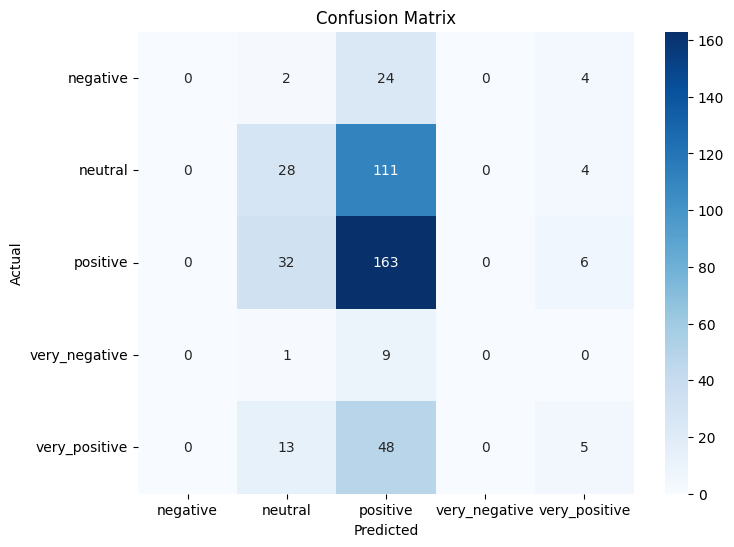

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
